In [17]:
import pandas as pd
import requests
import json
import numpy as py
from pprint import pprint
import matplotlib.pyplot as plt
import math
from scipy.stats import linregress
import scipy.stats as stats

#Pull in API key from personal file
from api_keys import geoapify_key

import plotly.express as px

In [18]:
growth = pd.read_csv('Datasets/cleaned_base.csv')
education = pd.read_csv('Datasets/education_cleaned.csv')
safety = pd.read_csv('Datasets/safety_data_cleaned.csv')
poverty = pd.read_csv('Datasets/poverty_cleaned.csv')


In [19]:
education = pd.merge(education, growth, on='iso_two')
# education.groupby(['iso_two', 'year'])['yr_sch'].sum()

# education['year'].value_counts()
list(education)

['iso_two',
 'BLcode',
 'year',
 'sex',
 'agefrom',
 'ageto',
 'lu',
 'yr_sch',
 'WBcode',
 'pop',
 'geo_country',
 'Unnamed: 0',
 'country',
 'iso_map',
 '2022_pop',
 '2020_pop',
 '2015_pop',
 '2010_pop',
 '2000_pop',
 '1990_pop',
 '1980_pop',
 '1970_pop',
 'area (km)',
 'density',
 'iso_three',
 'Capital',
 'Continent',
 'growth_rate_10_22']

In [20]:
growth

,Unnamed: 0,country,iso_map,2022_pop,2020_pop,2015_pop,2010_pop,2000_pop,1990_pop,1980_pop,1970_pop,area (km),density,iso_two,iso_three,Capital,Continent,growth_rate_10_22
0,0,Afghanistan,AFG,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,af,afg,Kabul,Asia,3.198007
1,1,Albania,ALB,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,al,alb,Tirana,Europe,-0.205617
2,2,Algeria,DZA,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,dz,dza,Algiers,Africa,1.892596
3,3,Andorra,AND,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,ad,and,Andorra la Vella,Europe,0.919712
4,4,Angola,AGO,35588987,33428485,28127721,23364185,16394062,11828638,8330047,6029700,1246700,28.5466,ao,ago,Luanda,Africa,3.569151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,211,Venezuela,VEN,28301696,28490453,30529716,28715022,24427729,19750579,15210443,11355475,916445,30.8820,ve,ven,Caracas,South America,-0.120749
189,212,Vietnam,VNM,98186856,96648685,92191398,87411012,79001142,66912613,52968270,41928849,331212,296.4472,vn,vnm,Hanoi,Asia,0.973467
190,214,Yemen,YEM,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,ye,yem,Sanaa,Asia,2.606871
191,215,Zambia,ZMB,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,zm,zmb,Lusaka,Africa,3.153026


In [21]:
education['70-15'] = ""

education = education.sort_values(['geo_country', 'year'])

education

for index, row in education.iterrows():
    if education.loc[index, 'year'] == 1970:
        store70 = education.loc[index, 'yr_sch']
    if education.loc[index, 'year'] == 2015:
        change = education.loc[index, 'yr_sch'] - store70
        education.loc[index, '70-15'] = change
        
education = education.loc[education['year'] == 2015]

education['growth_rate_70_15'] = (((education['2015_pop'] / education['1970_pop']) ** (1/12)) - 1)  * 100
education

,iso_two,BLcode,year,sex,agefrom,ageto,lu,yr_sch,WBcode,pop,...,1980_pop,1970_pop,area (km),density,iso_three,Capital,Continent,growth_rate_10_22,70-15,growth_rate_70_15
25,af,79,2015,MF,15,64,45.44,4.826,AFG,18117.0,...,12486631,10752971,652230,63.0587,afg,Kabul,Asia,3.198007,4.101,10.001649
28,al,156,2015,MF,15,64,2.46,10.972,ALB,1988.0,...,2941651,2324731,28748,98.8702,alb,Tirana,Europe,-0.205617,6.339,1.808212
477,dz,1,2015,MF,15,64,13.78,7.710,DZA,25994.0,...,18739378,13795915,2381741,18.8531,dza,Algiers,Africa,1.892596,6.02,9.171698
68,ar,67,2015,MF,15,64,0.62,10.206,ARG,27593.0,...,28024803,23842803,2780400,16.3683,arg,Buenos Aires,South America,0.853017,3.723,5.089255
54,am,308,2015,MF,15,64,0.55,11.766,ARM,2020.0,...,3135123,2534377,29743,93.4831,arm,Yerevan,Asia,-0.481571,3.15,1.066939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1835,ve,78,2015,MF,15,64,2.11,10.209,VEN,19630.0,...,15210443,11355475,916445,30.8820,ven,Caracas,South America,-0.120749,6.72,8.590822
1857,vn,320,2015,MF,15,64,13.82,7.771,VNM,65162.0,...,52968270,41928849,331212,296.4472,vnm,Hanoi,Asia,0.973467,3.639,6.786115
1873,ye,106,2015,MF,15,64,46.03,4.740,YEM,14974.0,...,9204938,6843607,527968,63.8232,yem,Sanaa,Asia,2.606871,4.672,12.629197
1896,zm,46,2015,MF,15,64,9.93,7.988,ZMB,8218.0,...,5720438,4281671,752612,26.5976,zmb,Lusaka,Africa,3.153026,4.863,11.754769


In [22]:
poverty['year'].unique()
# poverty['reporting_level'].value_counts()
poverty2000 = poverty.loc[poverty['year'] == 2000]
poverty2015 = poverty.loc[poverty['year'] == 2015]

poverty2000['country'].unique()
poverty2015['country'].unique()
poverty2000 = poverty2000[['country', 'headcount_ratio_international_povline', 'median']]

# poverty2000['welfare_type'].value_counts()
# # poverty2000.loc[poverty2000['country'] == 'China']

In [23]:
poverty0015 = pd.merge(poverty2015, poverty2000, on='country', how='left')
poverty0015 = poverty0015.dropna()



poverty0015

,Unnamed: 0,country,year,ppp_version,reporting_level,welfare_type,headcount_ratio_international_povline_x,median_x,geo_country,iso_two,headcount_ratio_international_povline_y,median_y
0,2542,Austria,2015,2017,national,income,0.677193,54.984206,Austria,at,0.241609,46.853650
1,2604,Belgium,2015,2017,national,income,0.070759,50.488321,Belgium,be,0.305506,44.315655
2,2641,Bolivia,2015,2017,national,income,4.629964,13.981904,Bolivia,bo,24.247424,5.818574
5,2743,Canada,2015,2017,national,income,0.245904,53.678290,Canada,ca,0.249810,42.651269
6,2766,Chile,2015,2017,national,income,0.431434,15.184600,Chile,cl,5.826292,8.158405
7,2849,Colombia,2015,2017,national,income,4.925476,9.650994,Colombia,co,17.496917,5.349314
8,2887,Costa Rica,2015,2017,national,income,1.573227,15.757311,Costa Rica,cr,6.926794,9.173734
12,2977,Denmark,2015,2017,national,income,0.175426,51.132123,Denmark,dk,0.000000,47.602969
13,3006,Dominican Republic,2015,2017,national,income,2.534987,9.981742,Dominican Republic,do,6.714430,8.467489
14,3060,Ecuador,2015,2017,national,income,3.440066,10.667513,Ecuador,ec,28.430418,3.623868


In [24]:
povertygrowth = pd.merge(poverty0015, growth, on='iso_two')


povertygrowth['growth_15_00'] = (((povertygrowth['2015_pop'] / povertygrowth['2000_pop']) ** (1/12)) - 1)  * 100
povertygrowth

,Unnamed: 0_x,country_x,year,ppp_version,reporting_level,welfare_type,headcount_ratio_international_povline_x,median_x,geo_country,iso_two,...,1990_pop,1980_pop,1970_pop,area (km),density,iso_three,Capital,Continent,growth_rate_10_22,growth_15_00
0,2542,Austria,2015,2017,national,income,0.677193,54.984206,Austria,at,...,7678729,7547561,7465301,83871,106.5877,aut,Vienna,Europe,0.557347,0.634828
1,2604,Belgium,2015,2017,national,income,0.070759,50.488321,Belgium,be,...,9959560,9828986,9629376,30528,381.8111,bel,Brussels,Europe,0.577306,0.765761
2,2641,Bolivia,2015,2017,national,income,4.629964,13.981904,Bolivia,bo,...,7096194,5736088,4585693,1098581,11.1272,bol,Sucre,South America,1.500680,2.148961
3,2743,Canada,2015,2017,national,income,0.245904,53.678290,Canada,ca,...,27657204,24511510,21434577,9984670,3.8513,can,Ottawa,North America,1.040269,1.277518
4,2766,Chile,2015,2017,national,income,0.431434,15.184600,Chile,cl,...,13342868,11469828,9820481,756102,25.9274,chl,Santiago,South America,1.192571,1.273859
5,2849,Colombia,2015,2017,national,income,4.925476,9.650994,Colombia,co,...,32601393,26176195,20905254,1141748,45.4339,col,Bogota,South America,1.226212,1.542010
6,2887,Costa Rica,2015,2017,national,income,1.573227,15.757311,Costa Rica,cr,...,3158253,2414303,1855697,51100,101.3861,cri,San José,North America,0.955226,1.741530
7,2977,Denmark,2015,2017,national,income,0.175426,51.132123,Denmark,dk,...,5144623,5125392,4922963,43094,136.4984,dnk,Copenhagen,Europe,0.484422,0.511427
8,3006,Dominican Republic,2015,2017,national,income,2.534987,9.981742,Dominican Republic,do,...,7129004,5755800,4475871,48671,230.7087,dom,Santo Domingo,North America,1.161514,1.659560
9,3060,Ecuador,2015,2017,national,income,3.440066,10.667513,Ecuador,ec,...,10449837,8135845,6172215,276841,65.0229,ecu,Quito,South America,1.537294,2.096337


In [25]:
povertygrowth.dtypes

Unnamed: 0_x                                 int64
country_x                                   object
year                                         int64
ppp_version                                  int64
reporting_level                             object
welfare_type                                object
headcount_ratio_international_povline_x    float64
median_x                                   float64
geo_country                                 object
iso_two                                     object
headcount_ratio_international_povline_y    float64
median_y                                   float64
Unnamed: 0_y                                 int64
country_y                                   object
iso_map                                     object
2022_pop                                     int64
2020_pop                                     int64
2015_pop                                     int64
2010_pop                                     int64
2000_pop                       

In [26]:
povertygrowth["poverty_15_00"] = povertygrowth['median_x']-povertygrowth['median_y']
povertygrowth

,Unnamed: 0_x,country_x,year,ppp_version,reporting_level,welfare_type,headcount_ratio_international_povline_x,median_x,geo_country,iso_two,...,1980_pop,1970_pop,area (km),density,iso_three,Capital,Continent,growth_rate_10_22,growth_15_00,poverty_15_00
0,2542,Austria,2015,2017,national,income,0.677193,54.984206,Austria,at,...,7547561,7465301,83871,106.5877,aut,Vienna,Europe,0.557347,0.634828,8.130556
1,2604,Belgium,2015,2017,national,income,0.070759,50.488321,Belgium,be,...,9828986,9629376,30528,381.8111,bel,Brussels,Europe,0.577306,0.765761,6.172666
2,2641,Bolivia,2015,2017,national,income,4.629964,13.981904,Bolivia,bo,...,5736088,4585693,1098581,11.1272,bol,Sucre,South America,1.500680,2.148961,8.163330
3,2743,Canada,2015,2017,national,income,0.245904,53.678290,Canada,ca,...,24511510,21434577,9984670,3.8513,can,Ottawa,North America,1.040269,1.277518,11.027021
4,2766,Chile,2015,2017,national,income,0.431434,15.184600,Chile,cl,...,11469828,9820481,756102,25.9274,chl,Santiago,South America,1.192571,1.273859,7.026195
5,2849,Colombia,2015,2017,national,income,4.925476,9.650994,Colombia,co,...,26176195,20905254,1141748,45.4339,col,Bogota,South America,1.226212,1.542010,4.301680
6,2887,Costa Rica,2015,2017,national,income,1.573227,15.757311,Costa Rica,cr,...,2414303,1855697,51100,101.3861,cri,San José,North America,0.955226,1.741530,6.583576
7,2977,Denmark,2015,2017,national,income,0.175426,51.132123,Denmark,dk,...,5125392,4922963,43094,136.4984,dnk,Copenhagen,Europe,0.484422,0.511427,3.529154
8,3006,Dominican Republic,2015,2017,national,income,2.534987,9.981742,Dominican Republic,do,...,5755800,4475871,48671,230.7087,dom,Santo Domingo,North America,1.161514,1.659560,1.514254
9,3060,Ecuador,2015,2017,national,income,3.440066,10.667513,Ecuador,ec,...,8135845,6172215,276841,65.0229,ecu,Quito,South America,1.537294,2.096337,7.043644


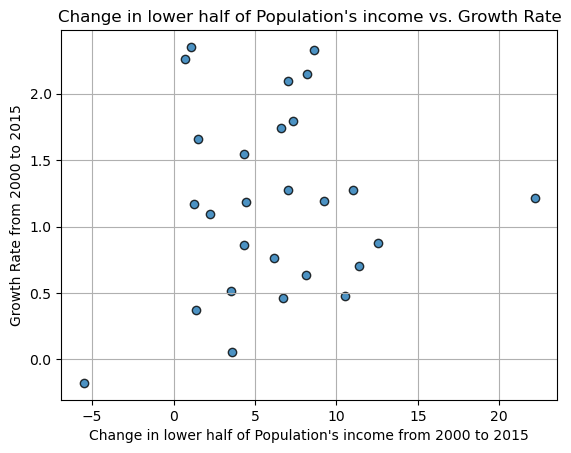

In [27]:
# Showcase a Scattter plot for the change in income per day below which half of the population live and population growth rate for certain countries
# x - change in half of the population's income from 2000 to 2015 for certain countries
# y - growth rate from 2000 to 2015 for certain countries
# Line of regression

x = povertygrowth['poverty_15_00']
y = povertygrowth['growth_15_00']

# # Remove rows with missing values in either x or y
# x = x.dropna()
# y = y.dropna()

# Convert x and y to numpy arrays
x = py.array(x)
y = py.array(y)


# Create scatter plot
plt.scatter(
    povertygrowth['poverty_15_00'],
    povertygrowth['growth_15_00'],
    edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Change in lower half of Population's income vs. Growth Rate")

# Set axis labels and title
plt.xlabel("Change in lower half of Population's income from 2000 to 2015")
plt.ylabel('Growth Rate from 2000 to 2015')
plt.title("Change in lower half of Population's income vs. Growth Rate")
plt.grid(True)

#Save the figure
plt.savefig(r"figure_1.png")

# Show plot
plt.show()

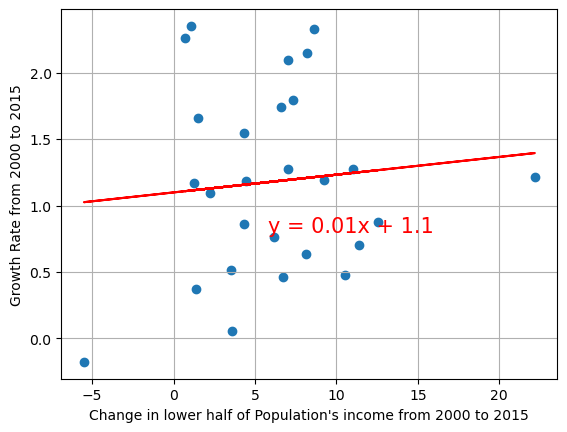

In [28]:
# Add the linear regression equation and line to plot
x = povertygrowth['poverty_15_00']
y = povertygrowth['growth_15_00']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Change in lower half of Population's income from 2000 to 2015")
plt.ylabel('Growth Rate from 2000 to 2015')
plt.grid(True)
plt.show()

The r-squared is: 0.009647767374390907


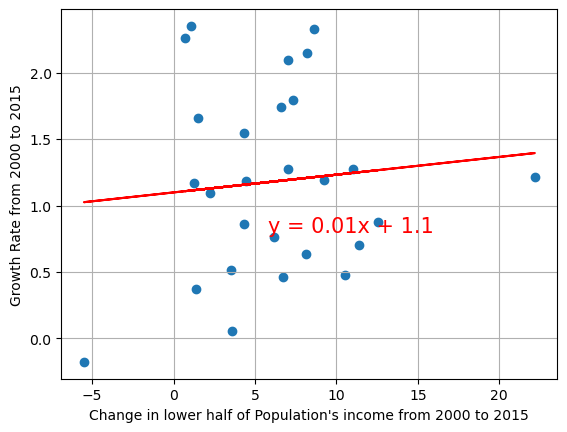

In [29]:
# Print out the r-squared value along with the plot.
x = povertygrowth['poverty_15_00']
y = povertygrowth['growth_15_00']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Change in lower half of Population's income from 2000 to 2015")
plt.ylabel('Growth Rate from 2000 to 2015')
plt.grid(True)
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [30]:
pvalue

0.625965822763384

In [32]:
stats.ttest_ind(povertygrowth['poverty_15_00'], povertygrowth['growth_15_00'], equal_var=False)

Ttest_indResult(statistic=4.929610831596806, pvalue=3.6935628123691146e-05)

AttributeError: 'Series' object has no attribute 'avg'

In [29]:
safety['change'] = safety['2022'] - safety['2010']
safety = safety.rename(columns={'iso3c': 'iso_three'})
for index, row in safety.iterrows():
    safety.loc[index, 'iso_three'] = safety.loc[index, 'iso_three'].lower()
safety = pd.merge(safety, growth, on='iso_three', how='left')
safety

,Country,iso_three,2008,2009,2010,2011,2012,2013,2014,2015,...,2000_pop,1990_pop,1980_pop,1970_pop,area (km),density,iso_two,Capital,Continent,growth_rate_10_22
0,Afghanistan,afg,3.095,3.191,3.040,3.021,3.154,3.258,3.212,3.316,...,19542982.0,10694796.0,12486631.0,10752971.0,652230.0,63.0587,af,Kabul,Asia,3.198007
1,Albania,alb,1.806,1.779,1.770,1.797,1.799,1.816,1.810,1.806,...,3182021.0,3295066.0,2941651.0,2324731.0,28748.0,98.8702,al,Tirana,Europe,-0.205617
2,Algeria,dza,2.306,2.333,2.333,2.479,2.399,2.383,2.293,2.263,...,30774621.0,25518074.0,18739378.0,13795915.0,2381741.0,18.8531,dz,Algiers,Africa,1.892596
3,Angola,ago,2.062,2.066,2.006,2.049,2.087,2.089,2.062,1.957,...,16394062.0,11828638.0,8330047.0,6029700.0,1246700.0,28.5466,ao,Luanda,Africa,3.569151
4,Argentina,arg,1.818,1.946,1.947,1.909,1.872,2.001,1.905,1.984,...,37070774.0,32637657.0,28024803.0,23842803.0,2780400.0,16.3683,ar,Buenos Aires,South America,0.853017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,Venezuela,ven,2.313,2.359,2.364,2.337,2.284,2.256,2.333,2.448,...,24427729.0,19750579.0,15210443.0,11355475.0,916445.0,30.8820,ve,Caracas,South America,-0.120749
159,Vietnam,vnm,1.832,1.846,1.870,1.860,1.923,1.871,1.832,1.932,...,79001142.0,66912613.0,52968270.0,41928849.0,331212.0,296.4472,vn,Hanoi,Asia,0.973467
160,Yemen,yem,2.407,2.474,2.562,2.565,2.609,2.547,2.611,2.738,...,18628700.0,13375121.0,9204938.0,6843607.0,527968.0,63.8232,ye,Sanaa,Asia,2.606871
161,Zambia,zmb,1.843,1.834,1.827,1.730,1.814,1.728,1.810,1.816,...,9891136.0,7686401.0,5720438.0,4281671.0,752612.0,26.5976,zm,Lusaka,Africa,3.153026


In [96]:
stats.ttest_ind(povertygrowth['headcount_ratio_international_povline_x'], povertygrowth['15-00'], equal_var=False)

Ttest_indResult(statistic=0.9040903694047558, pvalue=0.3723840823587993)